Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


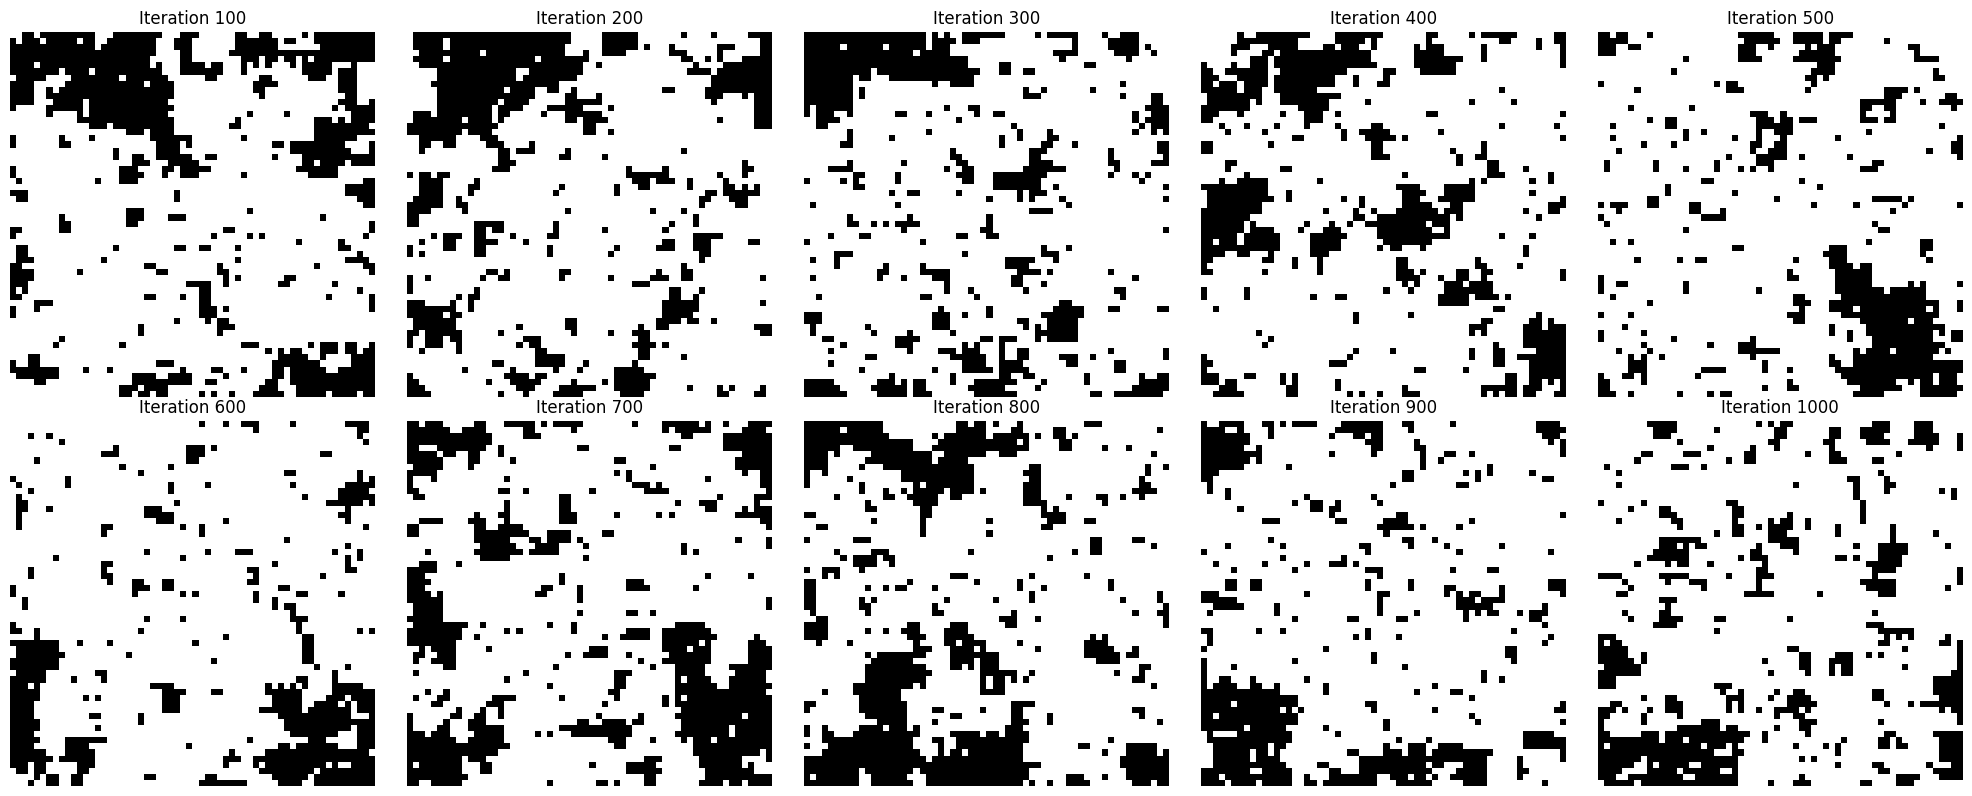

In [1]:
from graph_helpers import Ising2D, TreeSampler
from gibbs_sampler import GibbsSampler


N = 60  # grid size
theta = 0.45  # param
X = [-1, 1]  # x values
ising_model = Ising2D(N, theta, X)
gibbs_sampler = GibbsSampler(ising_model, initial_state="random")
# node-by-node sampler
gibbs_sampler.node_by_node_gibbs(num_iterations=1000, plot_interval=100)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


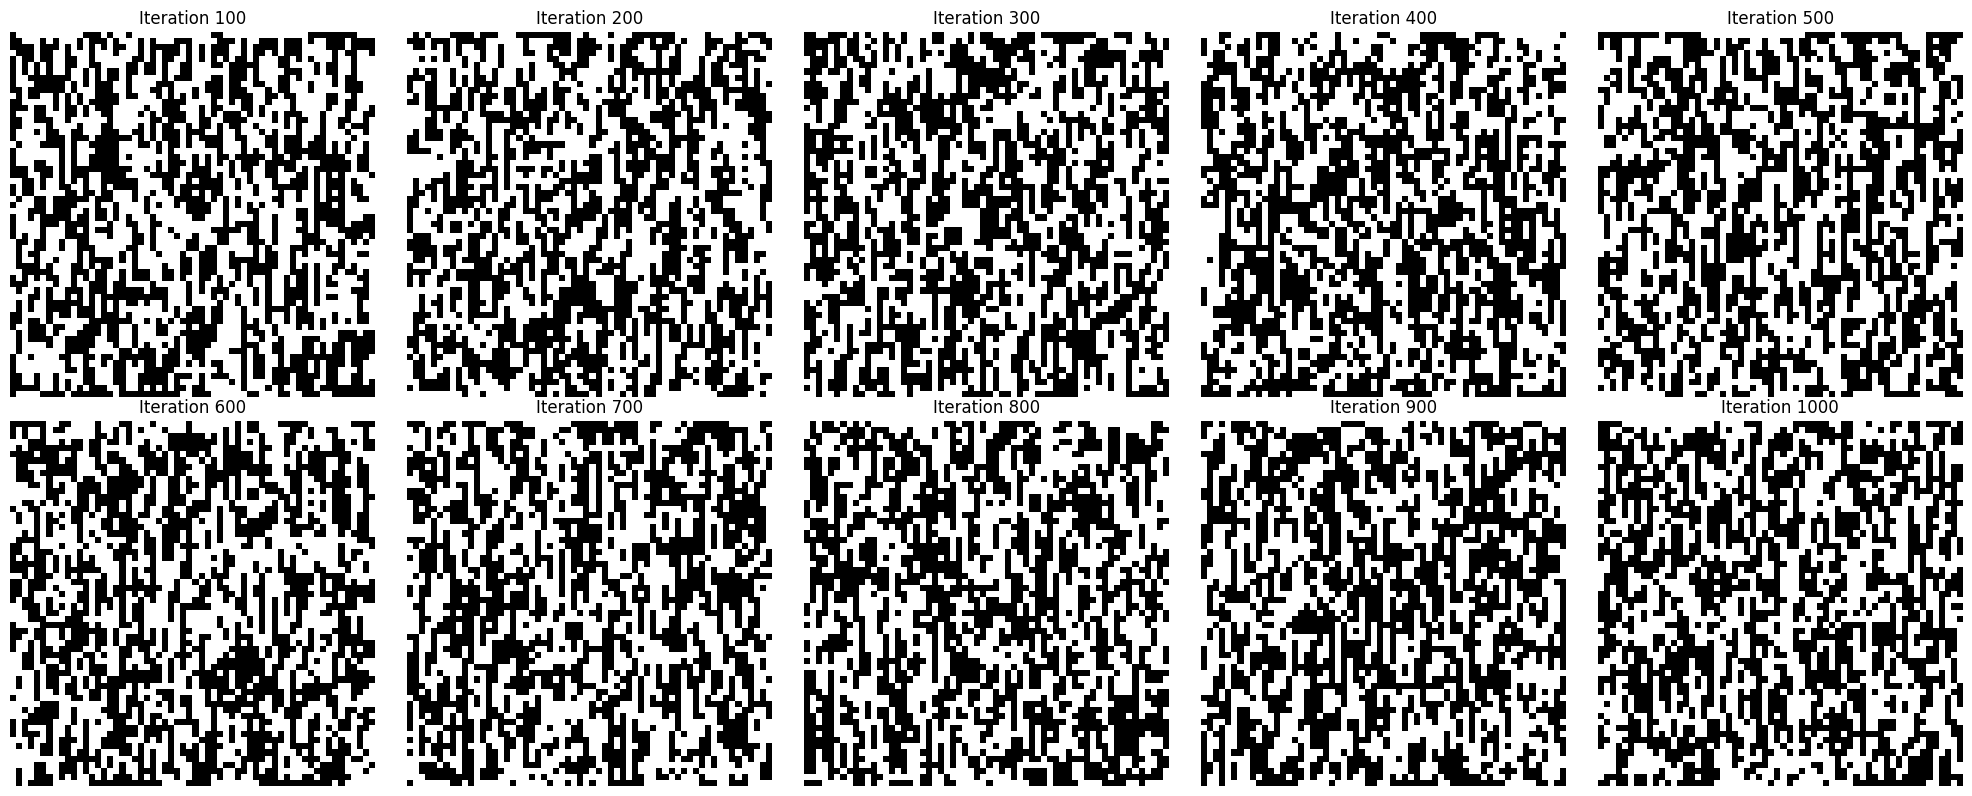

In [2]:
# block gibbs sampler
gibbs_sampler.block_gibbs_sampler(num_iterations=1000, plot_interval=100)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


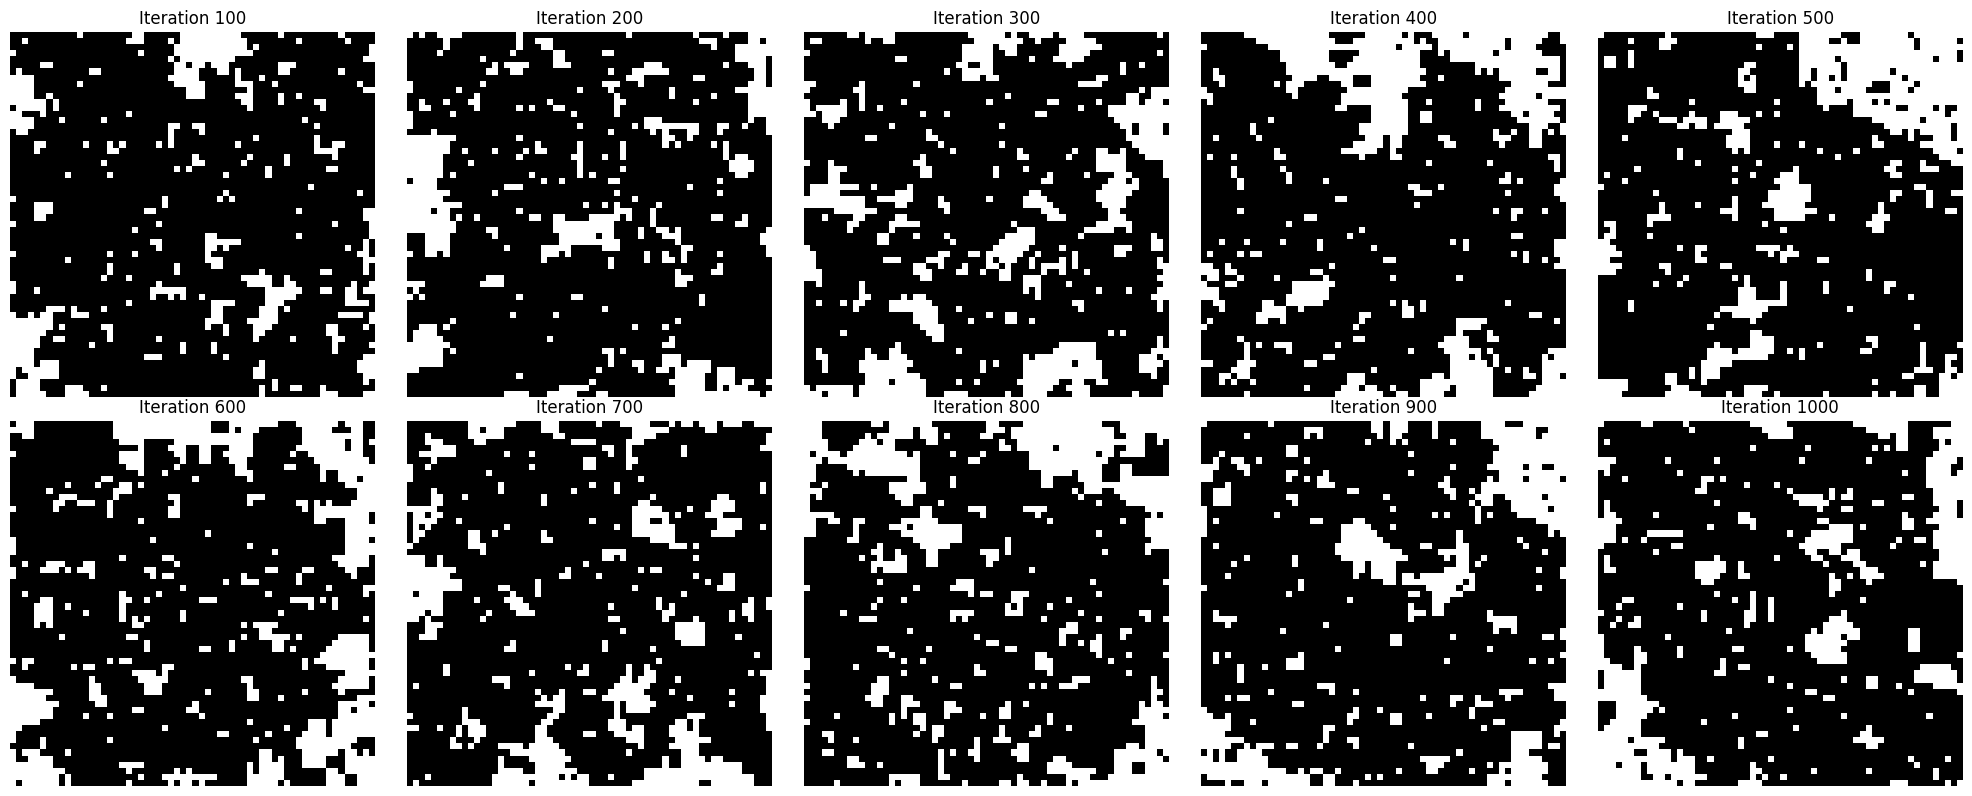

In [3]:
N = 60  # grid size
theta = 0.45  # param
X = [-1, 1]  # x values
ising_model = Ising2D(N, theta, X)
gibbs_sampler = GibbsSampler(ising_model, initial_state="all_pos")
# node-by-node sampler
gibbs_sampler.node_by_node_gibbs(
    num_iterations=1000, plot_interval=100, initial_state="all_pos"
)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


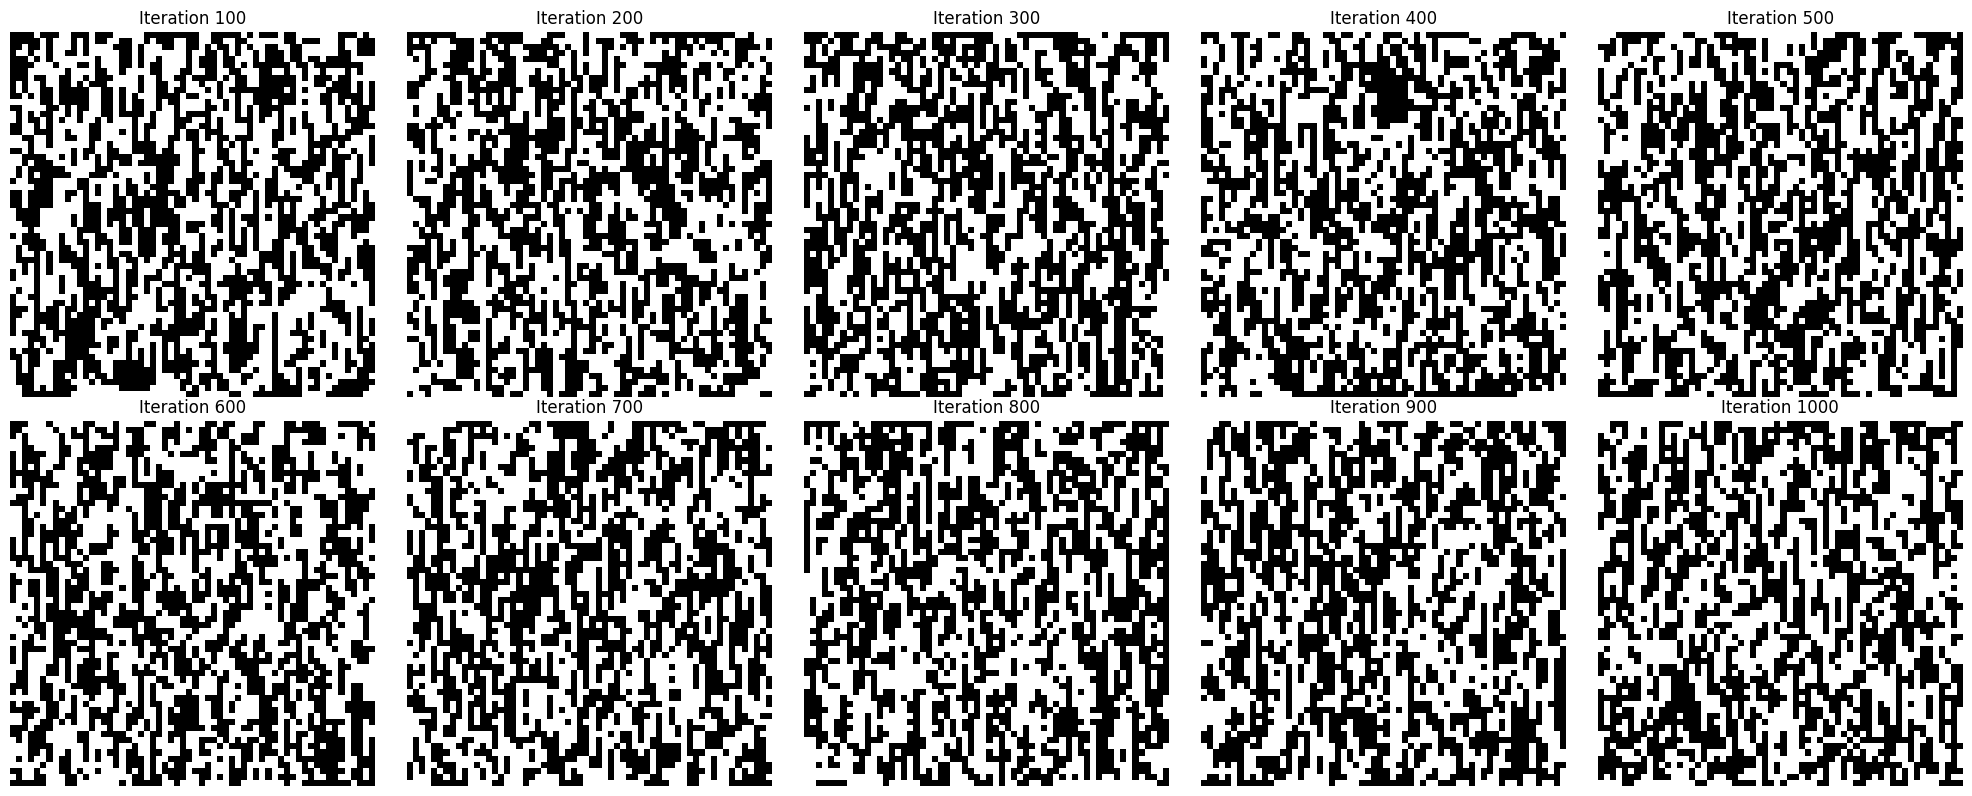

In [4]:
# block gibbs sampler
gibbs_sampler.block_gibbs_sampler(
    num_iterations=1000, plot_interval=100, initial_state="all_pos"
)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


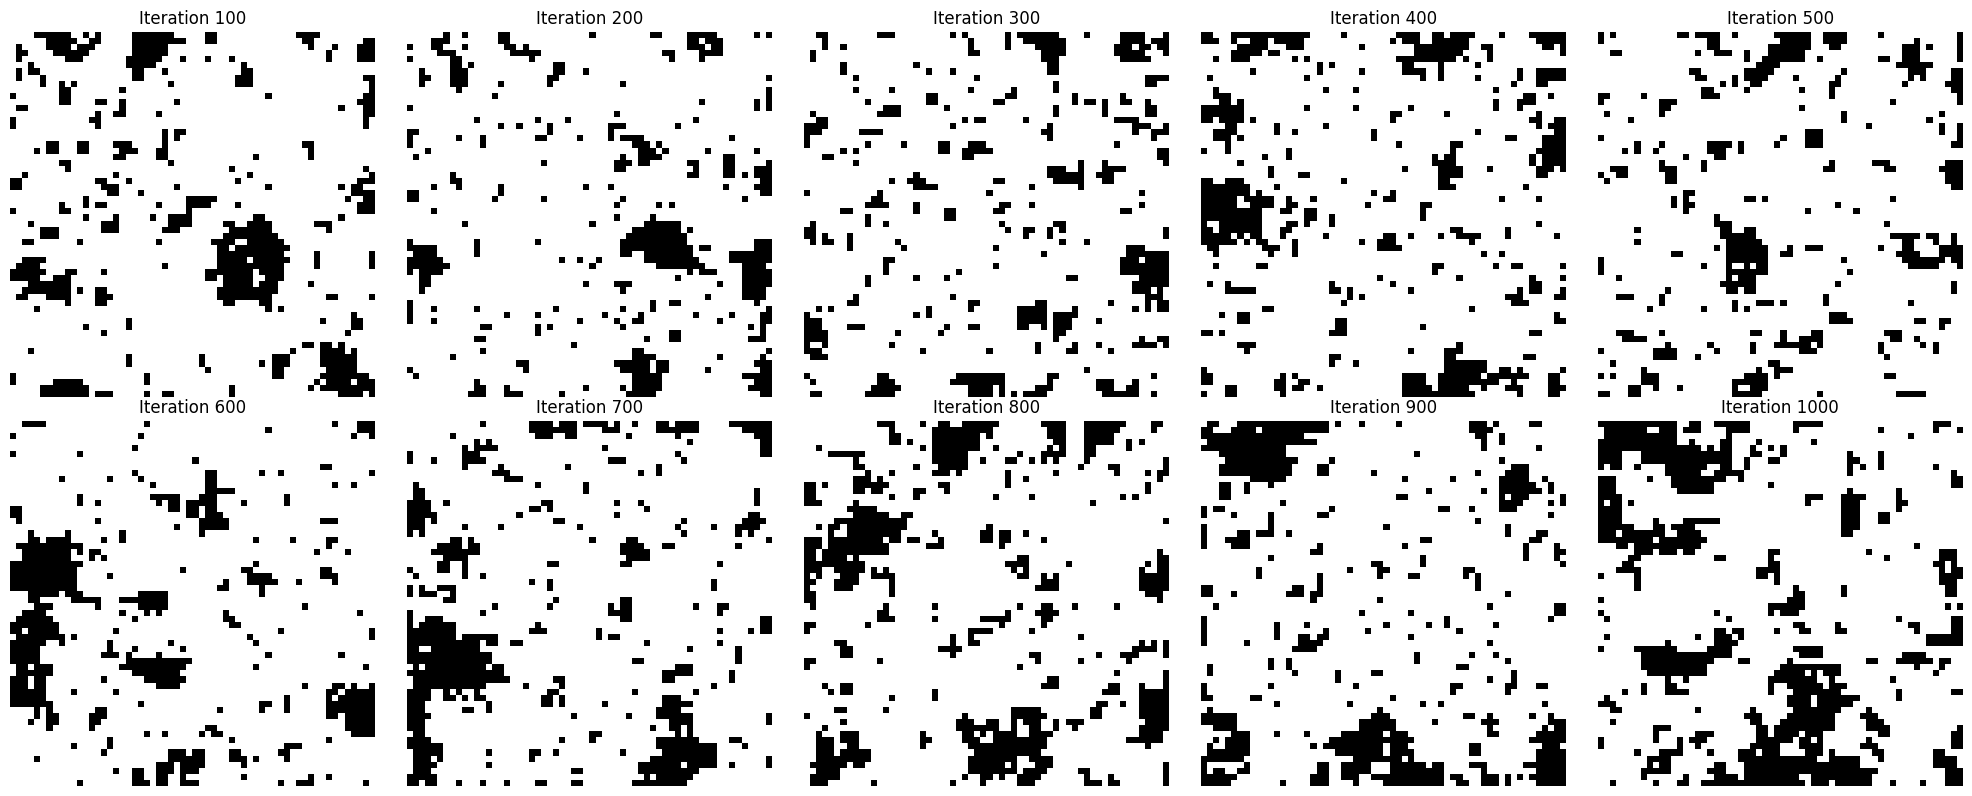

In [5]:
gibbs_sampler.node_by_node_gibbs(
    num_iterations=1000, plot_interval=100, initial_state="all_neg"
)

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000


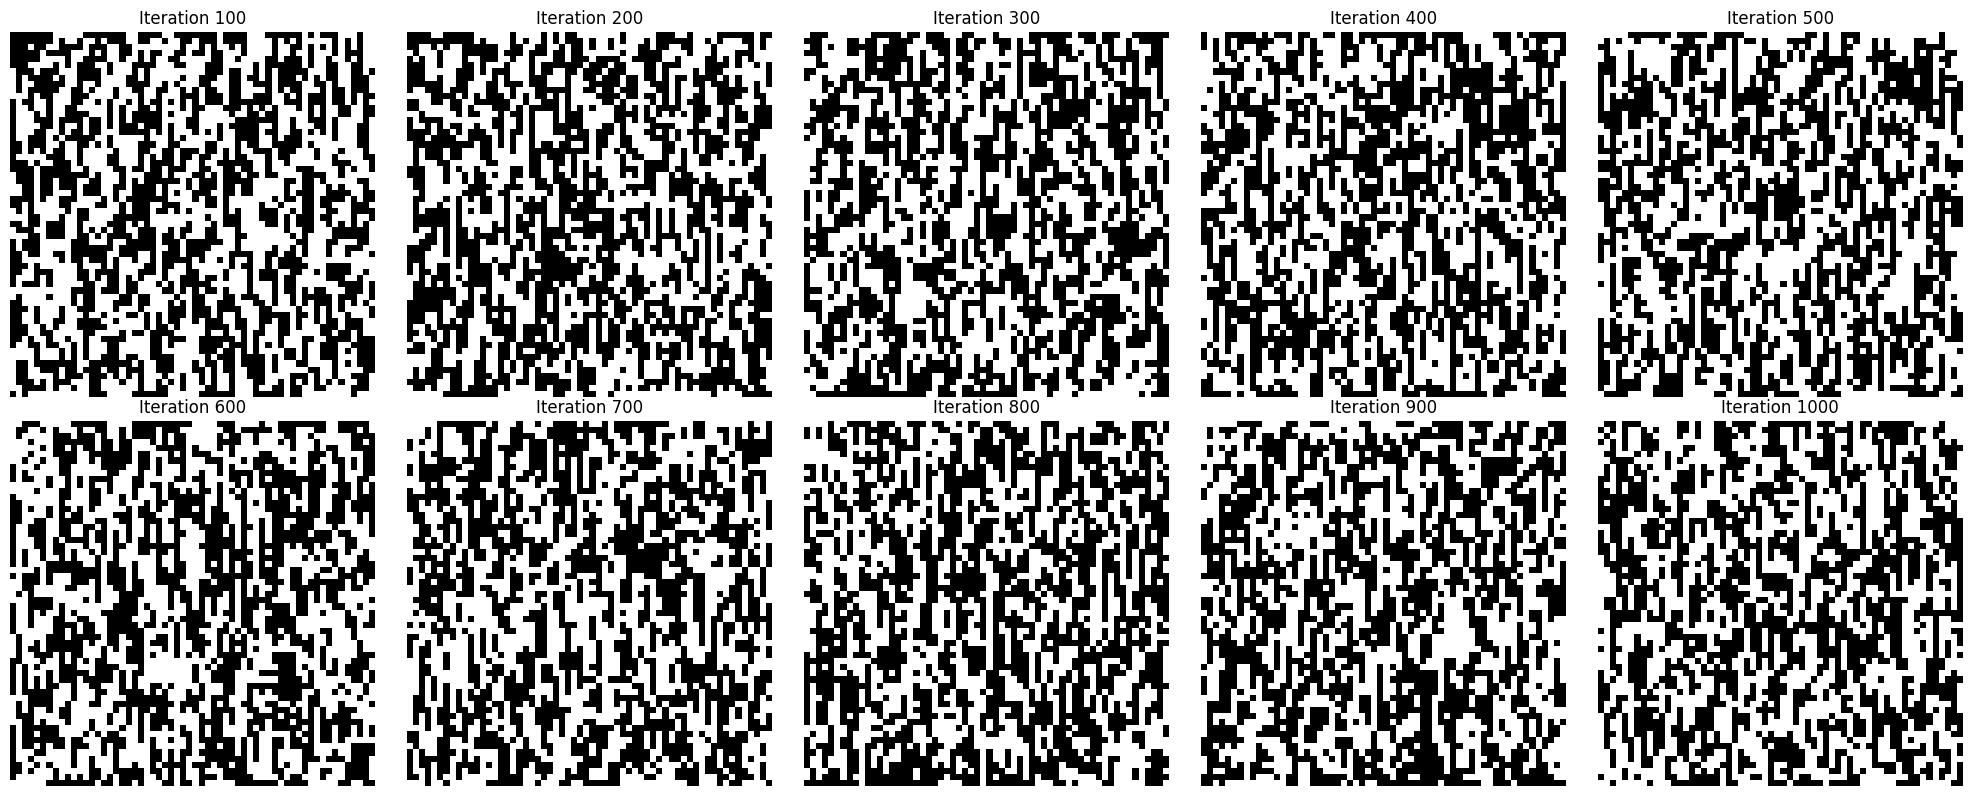

In [6]:
# block gibbs sampler
gibbs_sampler.block_gibbs_sampler(
    num_iterations=1000, plot_interval=100, initial_state="all_neg"
)

# 5.1

List of Key Routines and Their Functionalities:

1. **GraphModel Class**:

- ```__init__(self, node_potentials, edge_potentials)```: Initializes the undirected graphical model by setting up node potentials and edge potentials.
- ```get_V(self)```: Returns the list of nodes in the graph.
- ```get_E(self)```: Returns the list of edges in the graph.
- ```get_neighbors(self, i)```: Returns the neighbors of a given node i.
- ```visualize(self, output_file=None, show_potentials=False)```: Visualizes the graph structure, optionally displaying potentials.

2. **Ising2D Class**:
- ```__init__(self, N, theta, X=[-1, 1])```: Initializes a 2D Ising model on an N x N grid with coupling parameter theta and possible spin values X.
- ```generate_2Dising(self, N, theta, X)```: Generates the 2D Ising model graph using the GraphModel class.
- ```visualize(self, sample_state)```: Visualizes the Ising model grid based on the current spin states.
- ```split_and_calculate_trees(self)```: Splits the Ising graph into two trees (blocks A and B) for block Gibbs sampling and calculates the conditional potentials for each tree.
- ```calculate_tree_potentials(self, tree_nodes, other_tree_nodes, edges, theta)```: Calculates the node and edge potentials for a given tree, considering the influence of the other tree.

3. **TreeSampler Class**:

- ```__init__(self, tree, X=[-1, 1])```: Initializes the tree sampler with a tree graph and possible spin values.
- ```compute_message(self, i, j, messages)```: Computes the messages passed from node i to node j during belief propagation, using log-space computations for numerical stability.
- ```sum_product(self)```: Performs the sum-product algorithm on the tree to compute the messages needed for exact sampling.
- ```sample(self)```: Samples from the joint distribution of the tree using the computed messages, enabling exact sampling of the tree's spin states.

4. **GibbsSampler Class**:
- ```__init__(self, ising_model, initial_state='random')```: Initializes the Gibbs sampler with an Ising model and an initial spin state.
initialize_state(self, initial_state): Initializes the state of the spins based on the specified initial state ('random', 'all_ones', 'all_minus_ones', or a given state).
- ```node_by_node_gibbs(self, num_iterations=1000, plot_every=100)```: Performs node-by-node Gibbs sampling by iteratively updating each node's spin based on its conditional distribution given its neighbors. Each iteration corresponds to a full sweep over all nodes.
- ```block_gibbs_sampler(self, num_iterations=1000, plot_every=100)```: Performs block Gibbs sampling by alternating between sampling the two subgraphs (trees) A and B, effectively updating large blocks of nodes at each iteration.
- ```plot_samples(self, collected_samples, iterations)```: Plots the collected samples at specified intervals to visualize the sampling progress.


# 5.2

## Node-by-node sampler

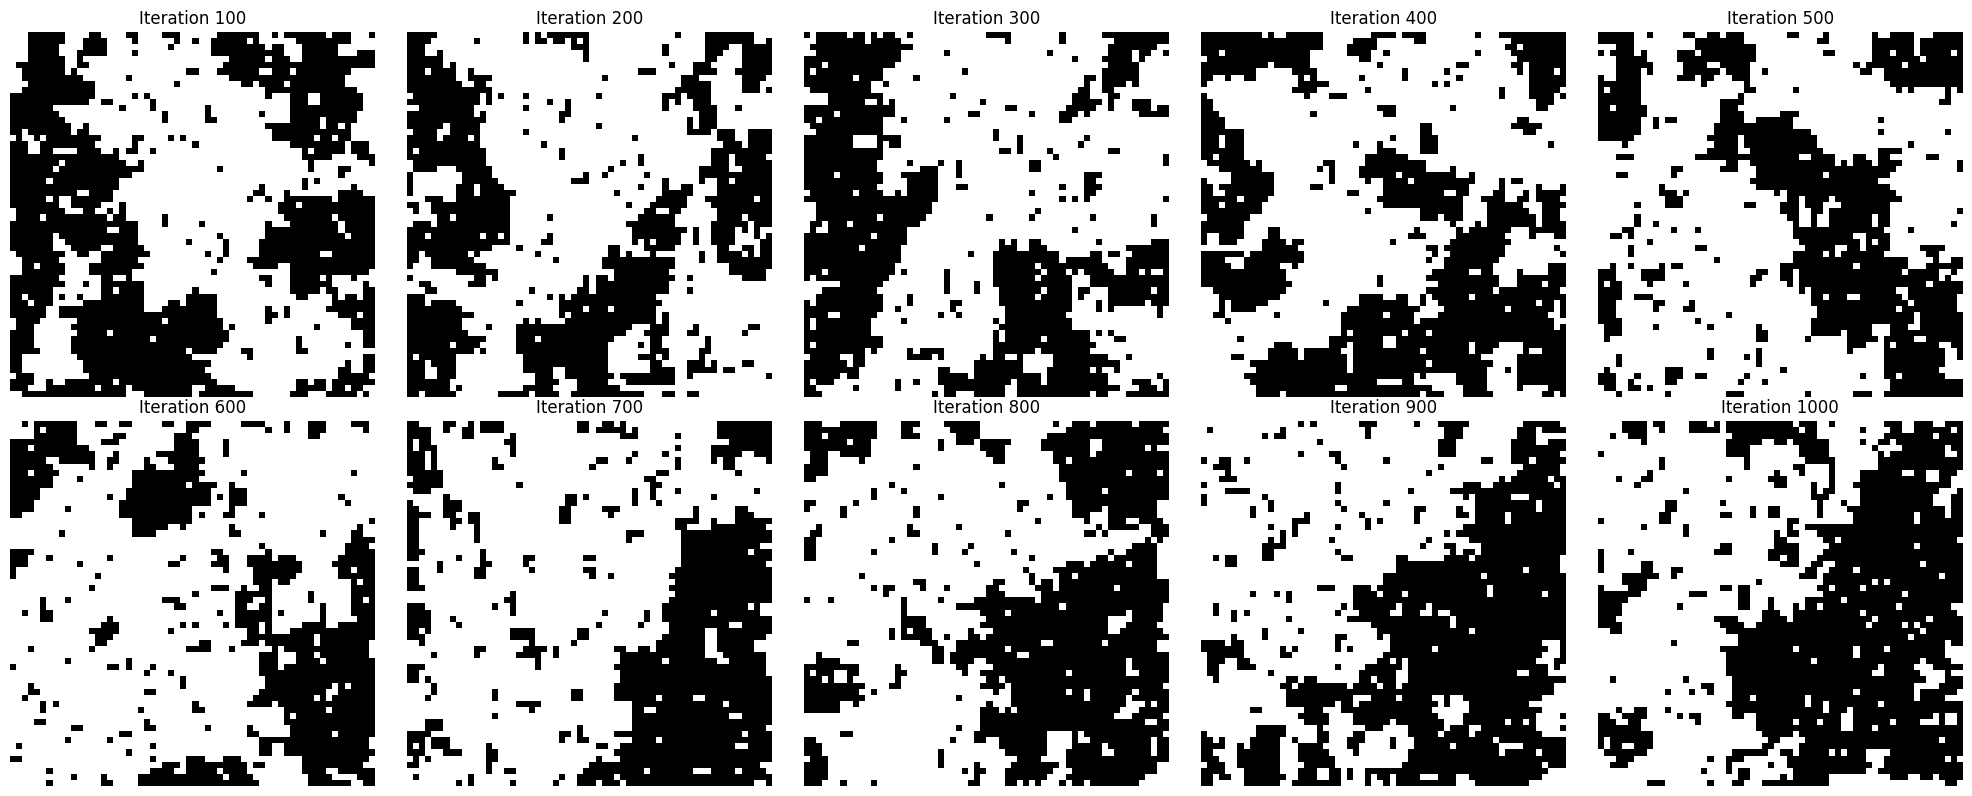

## Block sampler

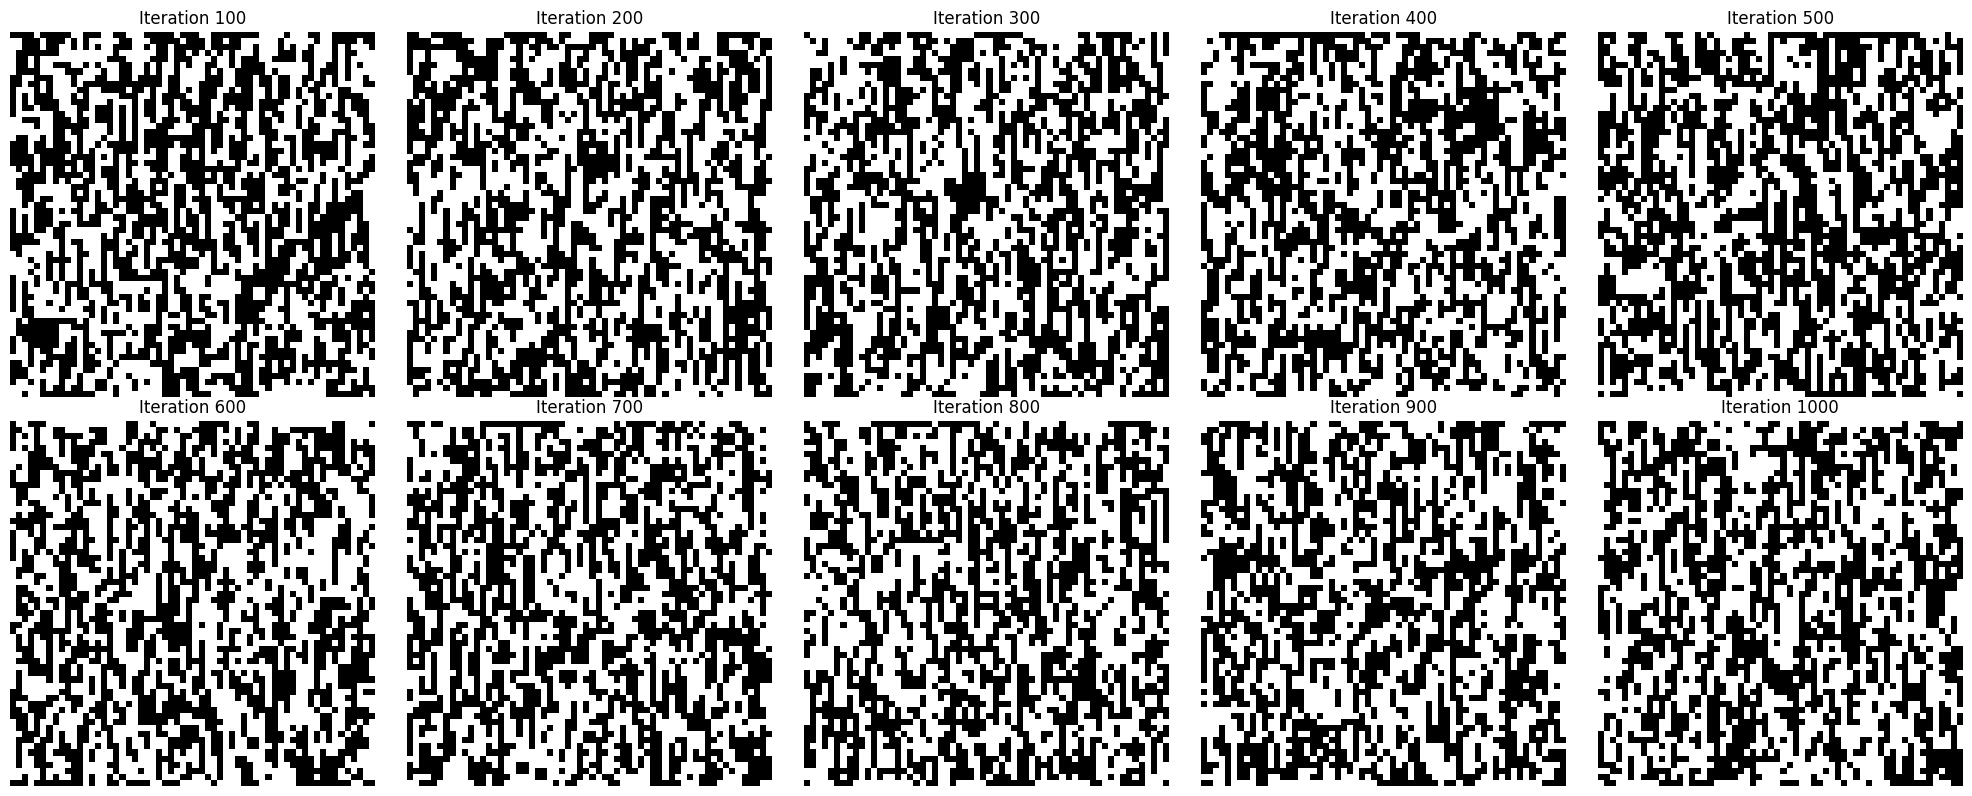

## 5.3

- **Mixing Speed**: The block Gibbs sampler reaches a well-mixed state by iteration 100, whereas the node-by-node sampler does not achieve the same level of mixing even after 1000 iterations. I think it is because the block Gibbs sampler updates large blocks of variables simultaneously by sampling entire subgraphs (trees) in each iteration. This allows the sampler to overcome local dependencies and correlations more effectively than the node-by-node sampler, which updates one node at a time
- **Runtime Per Sweep**: The node-by-node sampler takes approximately 30 seconds to complete 1000 iterations, while block Gibbs sampler takes approximately 3 minutes. I think it is because node-by-node sampler performs simple local updates that involve calculating probabilities based on immediate neighbors. While block Gibbs sampler relies on the sum-product algorithm for exact sampling from tree-structured subgraphs. This involves recursive message passing and computing marginal distributions, which are computationally intensive operations, especially for large trees. 
- **Initialization**: For node-by-node sampler, it is sensitive to initialization. Initializing with all +1s or all -1s results in worse performance compared to random initialization.Starting from a homogeneous state, the sampler may become trapped in a local mode due to the strong correlations between spins. On the other side, the block Gibbs sampler's performance is not significantly affected by the choice of initialization.Because it can quickly change substantial portions of the grid, allowing it to escape local modes more easily.

**initialize with all +1** \
node-by-node:

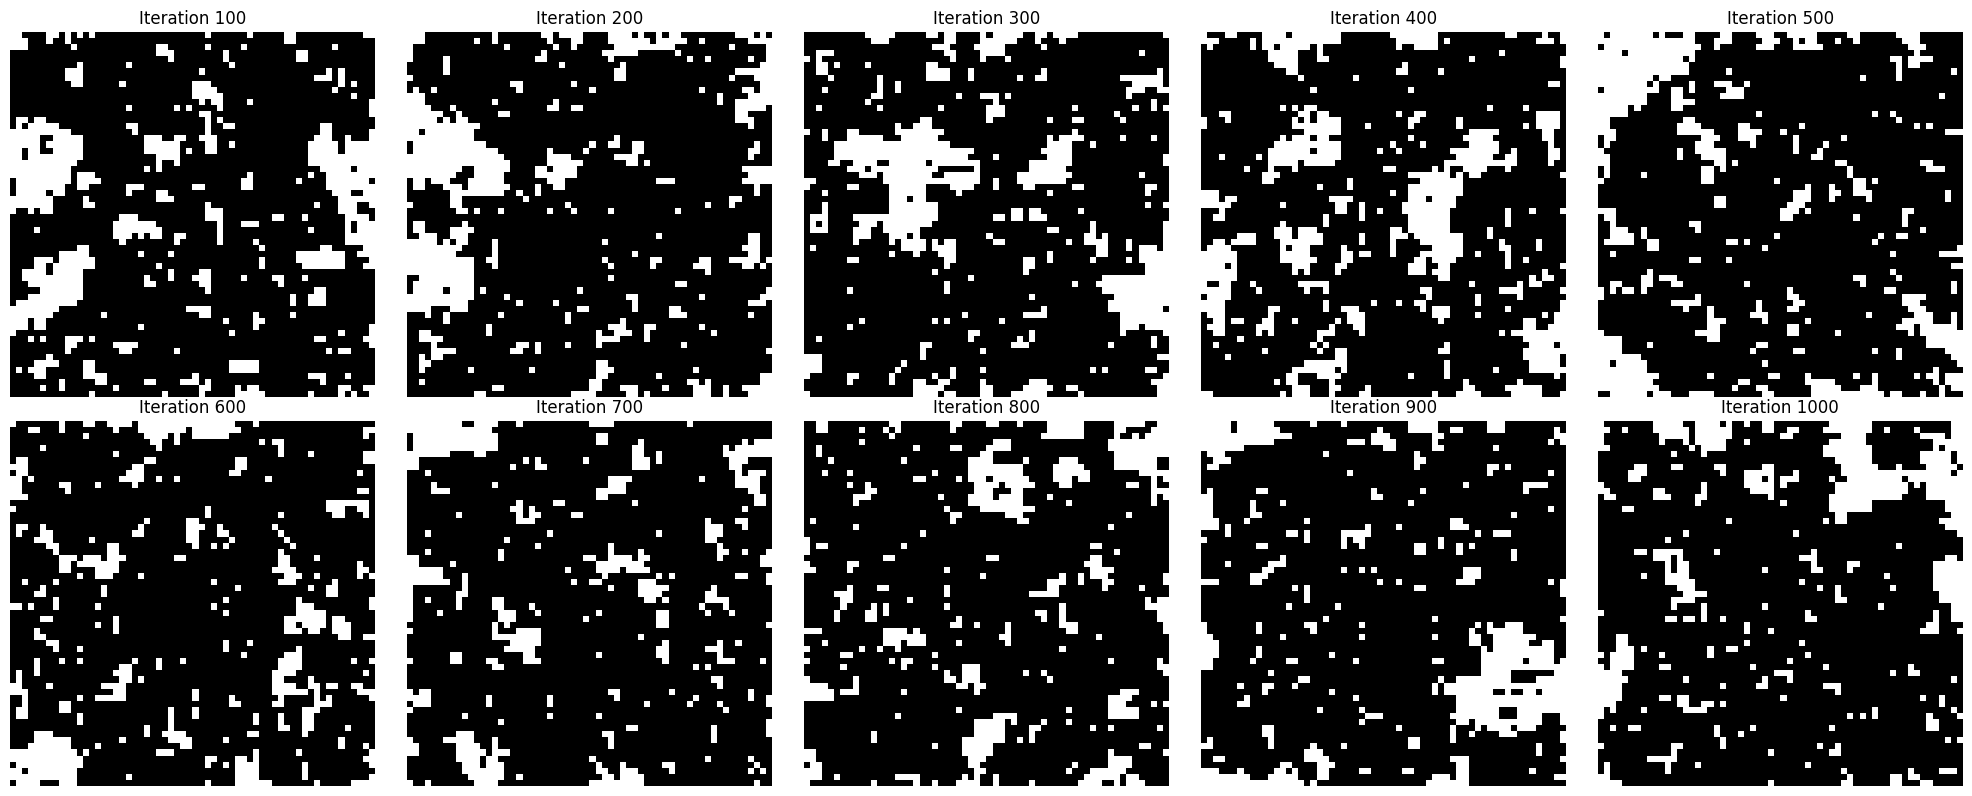

block gibbs sampler

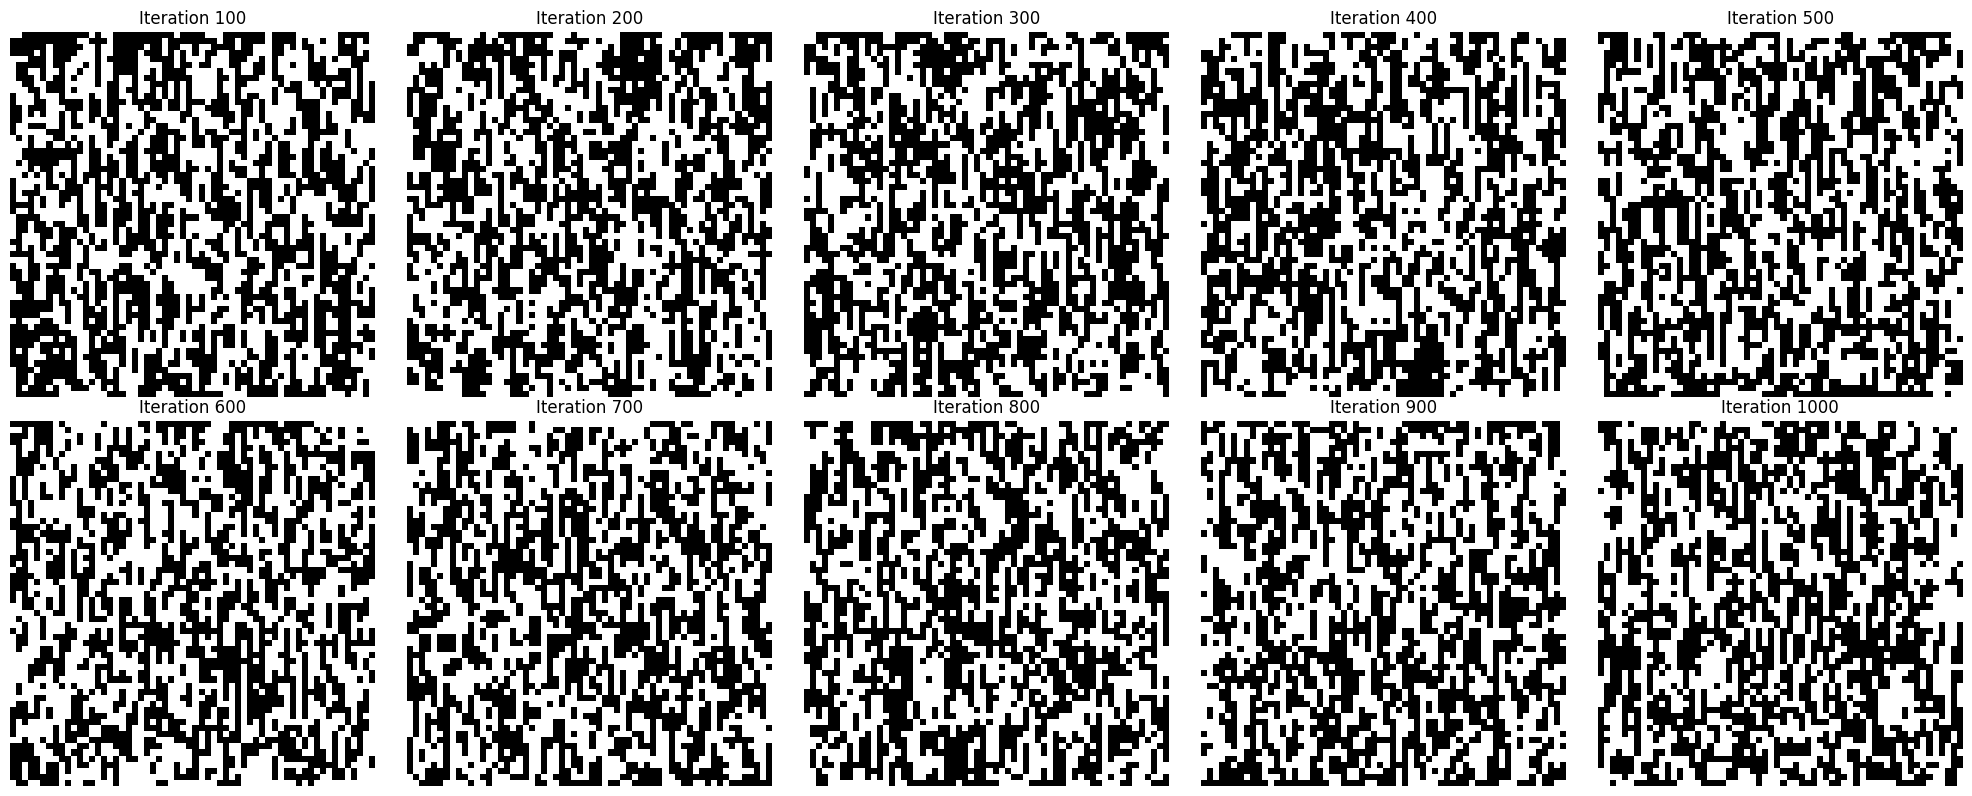

**initialize with all -1** \
node-by-node:
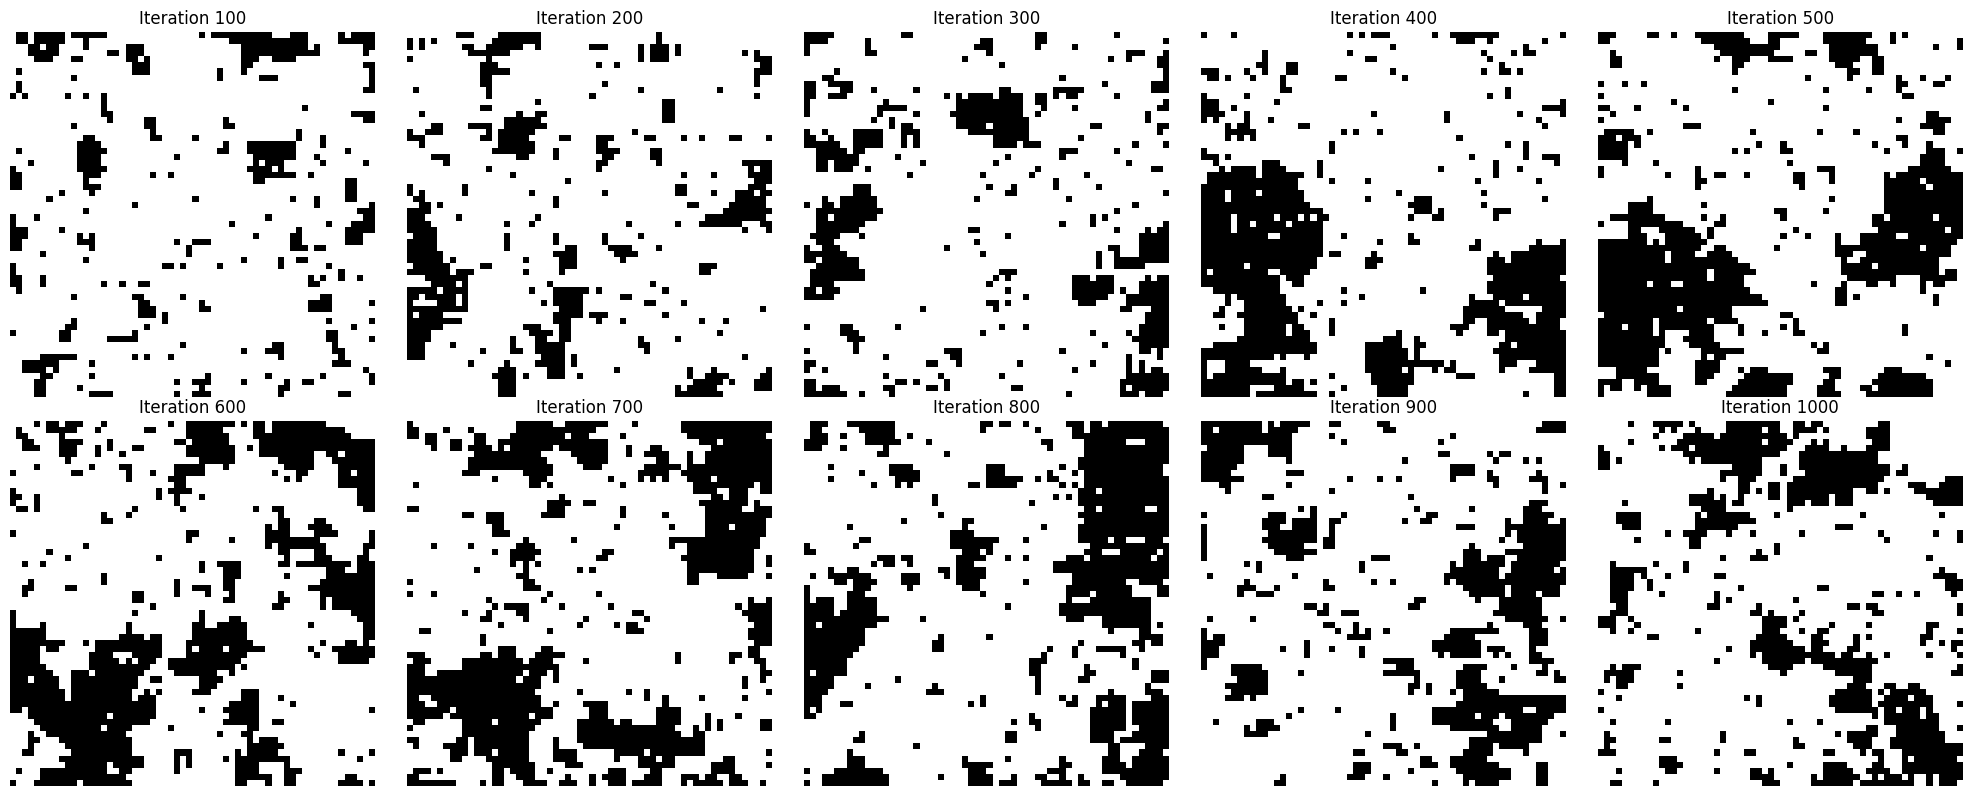

block gibbs sampler
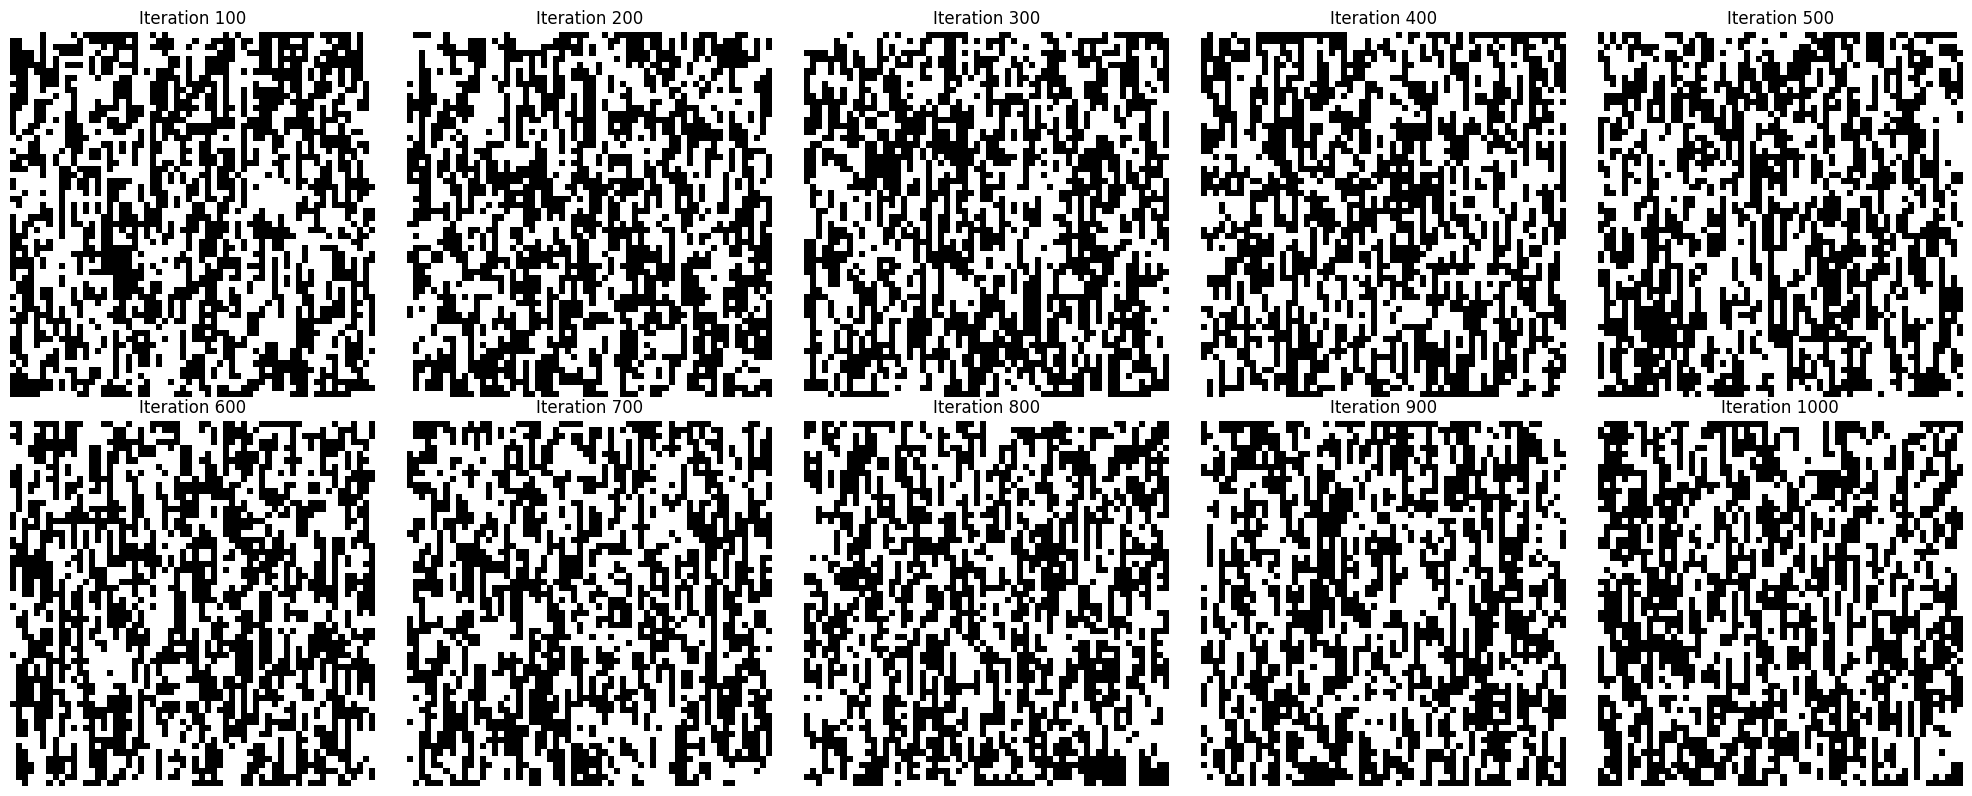